
# Visualizing a graph

This example notebook focusses on the different visualization options autodepgraph supports. 
For use in an experimental context a good visualization of the current state of the graph is important. However, at the same time the required dependencies can be a bit problematic or messy. For this reason several plotting options exist: 

- Plotting using graphviz and pyqtgraph 
    - default option. 
    - positioning using the graphviz dot layout for directed graphs
    - updates in real-time 
- Plotting using matplotlib 
    - rudimentary plot (live update note supported from a notebook)
    - positioning using the spring layout (does not require graphviz) 
    
- Writting to a dot file (in order to use an external library for the monitoring)
    - Not supported yet 
    - Color denoting the state of nodes not supported yet 
- Disabling plotting
    - For performance users


The plotting mode can be controlled using the parameter `graph.cfg_plot_mode`


In [1]:
from importlib import reload
import os
import autodepgraph as adg
from autodepgraph.graph import Graph
import matplotlib.pyplot as plt
%matplotlib inline


We start by creating a very basic graph 

In [2]:
test_graph = Graph('test_graph')
test_graph.add_node('A')
test_graph.add_node('B')
test_graph.add_node('C')
test_graph.add_node('D')
test_graph.add_node('E')

test_graph.E.parents(['D', 'C'])
test_graph.D.parents(['B'])
test_graph.C.parents(['A', 'B'])
test_graph.B.parents(['A'])

In [35]:
for node in test_graph.nodes.values():
    # ensures we always walk back the entire tree, creates interesting visualizaiton
    node.check_function('always_needs_calibration')
    node.calibrate_function('test_calibration_True_delayed')
    node.state('needs calibration')

### pyqtgraph visualization 

In [45]:
test_graph.cfg_plot_mode('pyqtgraph')
test_graph.E() # call Node E 

Executing node "E".
	Checking node E.
	Needs E calibration: True
	Node E broken: False
	Calibrating node E.
	Calibration of node E successful: True


'good'

### matplotlib visualization 

In [38]:
test_graph.clear_node_state()
for node in test_graph.nodes.values():
    node.state('needs calibration')

Executing node "E".
	Checking node E.
	Needs E calibration: True
	Node E broken: False
	Calibrating node E.
	Calibration of node E successful: True


'good'

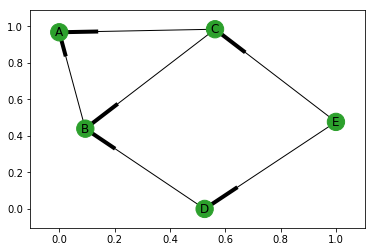

In [44]:
test_graph.cfg_plot_mode('matplotlib')
test_graph.E() # call Node E 

## No visualization

In [43]:
test_graph.cfg_plot_mode('None')
test_graph.E() # call Node E 

Executing node "E".
	Checking node E.
	Needs E calibration: True
	Node E broken: False
	Calibrating node E.
	Calibration of node E successful: True


'good'

### The monitor can also be updated by hand

In [46]:
test_graph.update_monitor()